In [1]:
import sys
import keras
#import tensorflow
from keras import backend as K
import os

print('Keras version:',keras.__version__)

# The images are in a folder named './train/train'
training_folder_name = "./train/train"

# All images are 64x64 pixels
img_size = (64,64)

# The folder contains a subfolder for each class of shape
classes = sorted(os.listdir(training_folder_name))
print(classes)

C:\Users\Khyati\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Keras version: 2.2.4
['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


In [2]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 30

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             horizontal_flip=True, # Flip some images at random
                             validation_split=0.3) # hold back 30% of the images for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    training_folder_name,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    training_folder_name,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data


Getting Data...
Preparing training dataset...
Found 3330 images belonging to 12 classes.
Preparing validation dataset...
Found 1420 images belonging to 12 classes.


In [3]:
# Define a CNN classifier network
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.layers import Activation, Flatten, Dense
from keras import optimizers

# Define the model as a sequence of layers
model = Sequential()

# The input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
model.add(Conv2D(32, (6, 6), input_shape=train_generator.image_shape, activation='relu'))

# Next we'll add a max pooling layer with a 2x2 patch
model.add(MaxPooling2D(pool_size=(2,2)))

# We can add as many layers as we think necessary - here we'll add another convolution layer and another and max poolinglayer
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# A dropout layer randomly drops some features to reduce inter-dependencies (which can cause over-fitting)
model.add(Dropout(0.3))

# Now we'll flatten the feature maps and generate an output layer with a predicted probability for each class
model.add(Flatten())
model.add(Dense(train_generator.num_classes, activation='softmax'))

# We'll use the ADAM optimizer
opt = optimizers.Adam(lr=0.001)

# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 59, 59, 32)        3488      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        36896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                55308     
Total para

In [4]:
num_epochs = 40
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

Epoch 1/40
111/111 [==============================] - 123s 1s/step - loss: 2.2512 - acc: 0.2207 - val_loss: 1.8413 - val_acc: 0.3709
Epoch 2/40
111/111 [==============================] - 82s 738ms/step - loss: 1.7421 - acc: 0.3778 - val_loss: 1.5296 - val_acc: 0.4604
Epoch 3/40
111/111 [==============================] - 70s 628ms/step - loss: 1.4705 - acc: 0.4904 - val_loss: 1.3656 - val_acc: 0.5259
Epoch 4/40
111/111 [==============================] - 65s 585ms/step - loss: 1.3573 - acc: 0.5336 - val_loss: 1.1964 - val_acc: 0.6151
Epoch 5/40
111/111 [==============================] - 66s 592ms/step - loss: 1.1822 - acc: 0.5982 - val_loss: 1.2690 - val_acc: 0.5561
Epoch 6/40
111/111 [==============================] - 65s 589ms/step - loss: 1.0970 - acc: 0.6378 - val_loss: 1.0850 - val_acc: 0.6266
Epoch 7/40
111/111 [==============================] - 74s 663ms/step - loss: 1.0098 - acc: 0.6571 - val_loss: 0.9849 - val_acc: 0.7000
Epoch 8/40
111/111 [==============================] - 69s

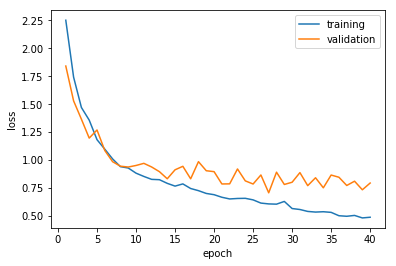

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()